### Bank Customer Data for Customer Churn

In [14]:
import sys
!{sys.executable} -m pip install xgboost

import warnings
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [16]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True) #Dropping unneeded rows

**Categorical encoding**

In [17]:
cat_cols = ["Geography", "Gender", "Card Type"]

enc = OrdinalEncoder()
df[cat_cols] = enc.fit_transform(df[cat_cols])

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1,1,2,0.0,464
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0,1,3,0.0,456
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1,1,3,0.0,377
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0,0,5,1.0,350
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0,0,5,1.0,425


**Train test**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Exited", axis=1), df["Exited"], test_size=0.20, random_state=42)

In [20]:
model = XGBClassifier(
    n_estimators=750,
    max_depth=4,
    learning_rate=0.01,
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="logloss",
    early_stopping_rounds=1000,
    verbose=100,
)

[0]	validation_0-logloss:0.68325
[100]	validation_0-logloss:0.20332
[200]	validation_0-logloss:0.07321
[300]	validation_0-logloss:0.02957
[400]	validation_0-logloss:0.01424
[500]	validation_0-logloss:0.00897
[600]	validation_0-logloss:0.00730
[700]	validation_0-logloss:0.00691
[749]	validation_0-logloss:0.00690


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=750, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

**Model evaluation**

In [21]:
print(f"Best iteration: {model.best_iteration} - logloss: {model.best_score}")
y_pred = model.predict(X_test)
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

Best iteration: 738 - logloss: 0.00689022985147312
Accuracy: 99.90%


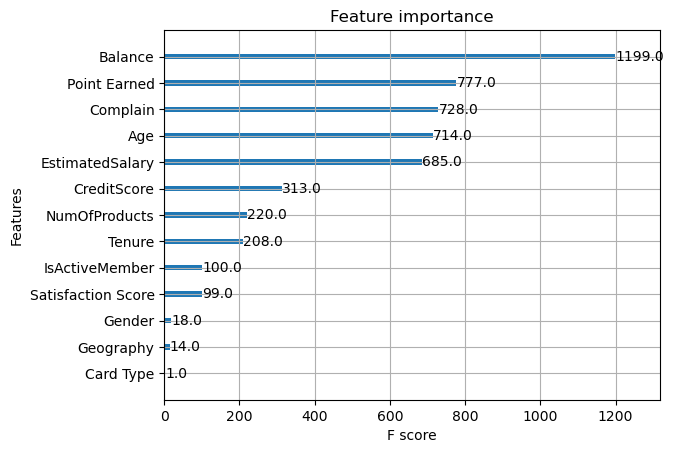

In [22]:
xgb.plot_importance(model)
plt.show()